In [1]:
#!pip install yfinance
#!pip install statsmodels

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [3]:
os.makedirs("tsla_stock/cleaned", exist_ok=True)
os.makedirs("nvda_stock/cleaned", exist_ok=True)
os.makedirs("stock/cleaned", exist_ok=True)

In [4]:
tickers = ['TSLA', 'NVDA', '^GSPC']
start_date = '2020-01-01'
end_date = '2024-12-31'

In [5]:
df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

[*********************100%***********************]  3 of 3 completed


In [6]:
df.rename(columns={'^GSPC': 'S&P 500'}, level=1, inplace=True)

In [7]:
for ticker in ['TSLA', 'NVDA', 'S&P 500']:
    stock_df = df.xs(ticker, axis=1, level=1)
    stock_df.to_csv(f"stock/cleaned/{ticker.replace(' ', '_')}_full_ohlcv.csv")
    print(f"Saved: {ticker} to CSV")

Saved: TSLA to CSV
Saved: NVDA to CSV
Saved: S&P 500 to CSV


In [8]:
df.dropna(inplace=True)

In [9]:
print(df.head())

Price      Adj Close                            Close                          \
Ticker          NVDA       TSLA      S&P 500     NVDA       TSLA      S&P 500   
Date                                                                            
2020-01-02  5.972161  28.684000  3257.850098  5.99775  28.684000  3257.850098   
2020-01-03  5.876571  29.534000  3234.850098  5.90175  29.534000  3234.850098   
2020-01-06  5.901216  30.102667  3246.280029  5.92650  30.102667  3246.280029   
2020-01-07  5.972660  31.270666  3237.179932  5.99825  31.270666  3237.179932   
2020-01-08  5.983861  32.809334  3253.050049  6.00950  32.809334  3253.050049   

Price          High                              Low                          \
Ticker         NVDA       TSLA      S&P 500     NVDA       TSLA      S&P 500   
Date                                                                           
2020-01-02  5.99775  28.713333  3258.139893  5.91800  28.114000  3235.530029   
2020-01-03  5.94575  30.266666 

In [10]:
def flatten_stock_data(df_multi, ticker):
    # Extract the stock's data across all price features
    stock_df = df_multi.xs(ticker, axis=1, level=1)
    stock_df = stock_df.copy()
    stock_df.reset_index(inplace=True)  # Make 'Date' a column
    stock_df.columns.name = None        # Remove column index name
    return stock_df

In [11]:
tsla_flat = flatten_stock_data(df, 'TSLA')
nvda_flat = flatten_stock_data(df, 'NVDA')
sp500_flat = flatten_stock_data(df, 'S&P 500')

In [12]:
tsla_flat.to_csv("TSLA_Stock.csv", index=False)
nvda_flat.to_csv("NVDA_Stock.csv", index=False)
sp500_flat.to_csv("SP500_Stock.csv", index=False)

In [13]:
df_ts = pd.read_csv('TSLA_Stock.csv', parse_dates=["Date"])

In [14]:
df_ts.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500


In [15]:
df_nv = pd.read_csv('NVDA_Stock.csv', parse_dates=["Date"])

In [16]:
df_nv.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,5.972161,5.99775,5.99775,5.91800,5.96875,237536000
1,2020-01-03,5.876571,5.90175,5.94575,5.85250,5.87750,205384000
2,2020-01-06,5.901216,5.92650,5.93175,5.78175,5.80800,262636000
3,2020-01-07,5.972660,5.99825,6.04425,5.90975,5.95500,314856000
4,2020-01-08,5.983861,6.00950,6.05100,5.95375,5.99400,277108000


In [17]:
df_sp = pd.read_csv('SP500_stock.csv', parse_dates=["Date"])

In [18]:
df_sp.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,3257.850098,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
1,2020-01-03,3234.850098,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2,2020-01-06,3246.280029,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
3,2020-01-07,3237.179932,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
4,2020-01-08,3253.050049,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


In [19]:
df_nr = pd.read_csv('NVDA_Financials_2020_2024.csv')

In [20]:
df_nr.head()

,Year,Revenue (Million $),Net Income (Million $),Assets (Million $),Liabilities (Million $),Shareholder Equity (Million $),Operating Cash Flow (Million $),Investing Cash Flow (Million $),Financing Cash Flow (Million $),Net Cash Flow (Million $)
0,2020,10918,2796,17315,5111,12204,4761,6145,-792,10114
1,2021,16675,4332,28791,11898,16893,5822,-19675,3804,1399
2,2022,26914,9752,44187,17575,26612,9108,-9830,1865,1143
3,2023,26974,4368,41182,19081,22101,5641,7375,-11617,-10049
4,2024,60922,29760,65728,22750,42978,28090,-10566,-13633,3891


In [21]:
df_tr = pd.read_csv('TSLA_Financials_2020_2024.csv')

In [22]:
df_tr.head()

,Year,Revenue (Million $),Net Income (Million $),Assets (Million $),Liabilities (Million $),Shareholder Equity (Million $),Operating Cash Flow (Million $),Investing Cash Flow (Million $),Financing Cash Flow (Million $),Net Cash Flow (Million $)
0,2020,31536,690,52148,29073,23075,5943,-3132,9973,13118
1,2021,53823,5524,62131,31116,31015,11497,-7868,-5203,-1757
2,2022,81462,12583,82338,36849,45489,14724,-11973,-3527,-1220
3,2023,96773,14999,106618,43251,63367,13256,-15584,2589,265
4,2024,97690,7130,122070,48453,73617,14923,-18787,3853,-152


In [23]:
df_ts.shape

(1257, 7)

In [24]:
df_nv.shape

(1257, 7)

In [25]:
df_sp.shape

(1257, 7)

In [26]:
df_nr.shape

(5, 10)

In [27]:
df_tr.shape

(5, 10)

In [28]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Adj Close  1257 non-null   float64       
 2   Close      1257 non-null   float64       
 3   High       1257 non-null   float64       
 4   Low        1257 non-null   float64       
 5   Open       1257 non-null   float64       
 6   Volume     1257 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [29]:
df_nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Adj Close  1257 non-null   float64       
 2   Close      1257 non-null   float64       
 3   High       1257 non-null   float64       
 4   Low        1257 non-null   float64       
 5   Open       1257 non-null   float64       
 6   Volume     1257 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [30]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Adj Close  1257 non-null   float64       
 2   Close      1257 non-null   float64       
 3   High       1257 non-null   float64       
 4   Low        1257 non-null   float64       
 5   Open       1257 non-null   float64       
 6   Volume     1257 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [31]:
df_nr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Year                             5 non-null      int64
 1   Revenue (Million $)              5 non-null      int64
 2   Net Income (Million $)           5 non-null      int64
 3   Assets (Million $)               5 non-null      int64
 4   Liabilities (Million $)          5 non-null      int64
 5   Shareholder Equity (Million $)   5 non-null      int64
 6   Operating Cash Flow (Million $)  5 non-null      int64
 7   Investing Cash Flow (Million $)  5 non-null      int64
 8   Financing Cash Flow (Million $)  5 non-null      int64
 9   Net Cash Flow (Million $)        5 non-null      int64
dtypes: int64(10)
memory usage: 528.0 bytes


In [32]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Year                             5 non-null      int64
 1   Revenue (Million $)              5 non-null      int64
 2   Net Income (Million $)           5 non-null      int64
 3   Assets (Million $)               5 non-null      int64
 4   Liabilities (Million $)          5 non-null      int64
 5   Shareholder Equity (Million $)   5 non-null      int64
 6   Operating Cash Flow (Million $)  5 non-null      int64
 7   Investing Cash Flow (Million $)  5 non-null      int64
 8   Financing Cash Flow (Million $)  5 non-null      int64
 9   Net Cash Flow (Million $)        5 non-null      int64
dtypes: int64(10)
memory usage: 528.0 bytes


In [33]:
df_ts.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1257,2022-06-30 22:13:27.637231616,2020-01-02 00:00:00,2021-04-01 00:00:00,2022-06-30 00:00:00,2023-09-29 00:00:00,2024-12-30 00:00:00,NaN
Adj Close,1257.0,213.279443,24.081333,173.860001,220.190002,259.670013,479.859985,83.321515
Close,1257.0,213.279443,24.081333,173.860001,220.190002,259.670013,479.859985,83.321515
High,1257.0,218.11713,26.990667,177.190002,225.339996,264.896667,488.540009,85.225296
Low,1257.0,208.204688,23.367332,170.009995,215.330002,254.210007,457.51001,81.382769
Open,1257.0,213.315219,24.98,173.889999,220.916672,259.209991,475.899994,83.44925
Volume,1257.0,125568626.332538,29401800.0,76009800.0,101993600.0,145417400.0,914082000.0,82108212.180938


In [34]:
df_nv.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1257,2022-06-30 22:13:27.637231616,2020-01-02 00:00:00,2021-04-01 00:00:00,2022-06-30 00:00:00,2023-09-29 00:00:00,2024-12-30 00:00:00,NaN
Adj Close,1257.0,38.366171,4.891976,13.571056,21.224369,45.559887,148.856064,38.149786
Close,1257.0,38.395179,4.91,13.60675,21.257999,45.581001,148.880005,38.148031
High,1257.0,39.10357,5.2485,13.84175,21.754999,46.217999,152.889999,38.854426
Low,1257.0,37.620118,4.517,13.3625,20.811001,44.923,146.259995,37.400731
Open,1257.0,38.396602,5.0025,13.63,21.200001,45.719002,149.350006,38.202032
Volume,1257.0,447037221.161496,97884000.0,308864000.0,421245000.0,547007000.0,1543911000.0,187607992.332585


In [35]:
df_sp.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1257,2022-06-30 22:13:27.637231616,2020-01-02 00:00:00,2021-04-01 00:00:00,2022-06-30 00:00:00,2023-09-29 00:00:00,2024-12-30 00:00:00,NaN
Adj Close,1257.0,4258.31654,2237.399902,3818.830078,4204.310059,4602.450195,6090.27002,766.387561
Close,1257.0,4258.31654,2237.399902,3818.830078,4204.310059,4602.450195,6090.27002,766.387561
High,1257.0,4282.671425,2300.72998,3845.800049,4233.450195,4627.77002,6099.970215,764.33257
Low,1257.0,4230.940689,2191.860107,3791.5,4184.109863,4574.060059,6079.97998,768.532265
Open,1257.0,4257.593748,2290.709961,3817.02002,4206.049805,4602.819824,6089.029785,766.350866
Volume,1257.0,4380254335.719968,1639500000.0,3751400000.0,4114240000.0,4713260000.0,9976520000.0,1044817338.503776


In [36]:
df_nr.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5.0,2022.0,1.581139,2020.0,2021.0,2022.0,2023.0,2024.0
Revenue (Million $),5.0,28480.6,19397.072093,10918.0,16675.0,26914.0,26974.0,60922.0
Net Income (Million $),5.0,10201.6,11247.879302,2796.0,4332.0,4368.0,9752.0,29760.0
Assets (Million $),5.0,39440.6,18162.766455,17315.0,28791.0,41182.0,44187.0,65728.0
Liabilities (Million $),5.0,15283.0,6898.586196,5111.0,11898.0,17575.0,19081.0,22750.0
Shareholder Equity (Million $),5.0,24157.6,11833.470594,12204.0,16893.0,22101.0,26612.0,42978.0
Operating Cash Flow (Million $),5.0,10684.4,9869.212648,4761.0,5641.0,5822.0,9108.0,28090.0
Investing Cash Flow (Million $),5.0,-5310.2,11689.048409,-19675.0,-10566.0,-9830.0,6145.0,7375.0
Financing Cash Flow (Million $),5.0,-4074.6,8005.895596,-13633.0,-11617.0,-792.0,1865.0,3804.0
Net Cash Flow (Million $),5.0,1299.6,7301.269191,-10049.0,1143.0,1399.0,3891.0,10114.0


In [37]:
df_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5.0,2022.0,1.581139,2020.0,2021.0,2022.0,2023.0,2024.0
Revenue (Million $),5.0,72256.8,28855.744518,31536.0,53823.0,81462.0,96773.0,97690.0
Net Income (Million $),5.0,8185.2,5703.989192,690.0,5524.0,7130.0,12583.0,14999.0
Assets (Million $),5.0,85061.0,29371.906339,52148.0,62131.0,82338.0,106618.0,122070.0
Liabilities (Million $),5.0,37748.4,8138.293482,29073.0,31116.0,36849.0,43251.0,48453.0
Shareholder Equity (Million $),5.0,47312.6,21248.904414,23075.0,31015.0,45489.0,63367.0,73617.0
Operating Cash Flow (Million $),5.0,12068.6,3689.795699,5943.0,11497.0,13256.0,14724.0,14923.0
Investing Cash Flow (Million $),5.0,-11468.8,6188.964671,-18787.0,-15584.0,-11973.0,-7868.0,-3132.0
Financing Cash Flow (Million $),5.0,1537.0,6097.301698,-5203.0,-3527.0,2589.0,3853.0,9973.0
Net Cash Flow (Million $),5.0,2050.8,6239.427033,-1757.0,-1220.0,-152.0,265.0,13118.0


In [38]:
df_ts.describe(exclude=['int', 'float']).T

,count,mean,min,25%,50%,75%,max
Date,1257,2022-06-30 22:13:27.637231616,2020-01-02 00:00:00,2021-04-01 00:00:00,2022-06-30 00:00:00,2023-09-29 00:00:00,2024-12-30 00:00:00


In [39]:
df_nv.describe(exclude=['int', 'float']).T

,count,mean,min,25%,50%,75%,max
Date,1257,2022-06-30 22:13:27.637231616,2020-01-02 00:00:00,2021-04-01 00:00:00,2022-06-30 00:00:00,2023-09-29 00:00:00,2024-12-30 00:00:00


In [40]:
df_sp.describe(exclude=['int', 'float']).T

,count,mean,min,25%,50%,75%,max
Date,1257,2022-06-30 22:13:27.637231616,2020-01-02 00:00:00,2021-04-01 00:00:00,2022-06-30 00:00:00,2023-09-29 00:00:00,2024-12-30 00:00:00


In [41]:
df_ts.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [42]:
df_nv.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [43]:
df_sp.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [44]:
df_nr.isnull().sum()

Year                               0
Revenue (Million $)                0
Net Income (Million $)             0
Assets (Million $)                 0
Liabilities (Million $)            0
Shareholder Equity (Million $)     0
Operating Cash Flow (Million $)    0
Investing Cash Flow (Million $)    0
Financing Cash Flow (Million $)    0
Net Cash Flow (Million $)          0
dtype: int64

In [45]:
df_tr.isnull().sum()

Year                               0
Revenue (Million $)                0
Net Income (Million $)             0
Assets (Million $)                 0
Liabilities (Million $)            0
Shareholder Equity (Million $)     0
Operating Cash Flow (Million $)    0
Investing Cash Flow (Million $)    0
Financing Cash Flow (Million $)    0
Net Cash Flow (Million $)          0
dtype: int64

In [46]:
df_ts.duplicated().sum()

np.int64(0)

In [47]:
df_nv.duplicated().sum()

np.int64(0)

In [48]:
df_sp.duplicated().sum()

np.int64(0)

In [49]:
df_nr.duplicated().sum()

np.int64(0)

In [50]:
df_tr.duplicated().sum()

np.int64(0)

## EDA

In [52]:
df = pd.DataFrame()
df['Date'] = df_ts['Date']
df['TSLA'] = df_ts['Adj Close']
df['NVDA'] = df_nv['Adj Close']
df['S&P 500'] = df_sp['Adj Close']
df.set_index('Date', inplace=True)
df.dropna(inplace=True)

In [53]:
df.head()

,TSLA,NVDA,S&P 500
Date,,,
2020-01-02,28.684000,5.972161,3257.850098
2020-01-03,29.534000,5.876571,3234.850098
2020-01-06,30.102667,5.901216,3246.280029
2020-01-07,31.270666,5.972660,3237.179932
2020-01-08,32.809334,5.983861,3253.050049


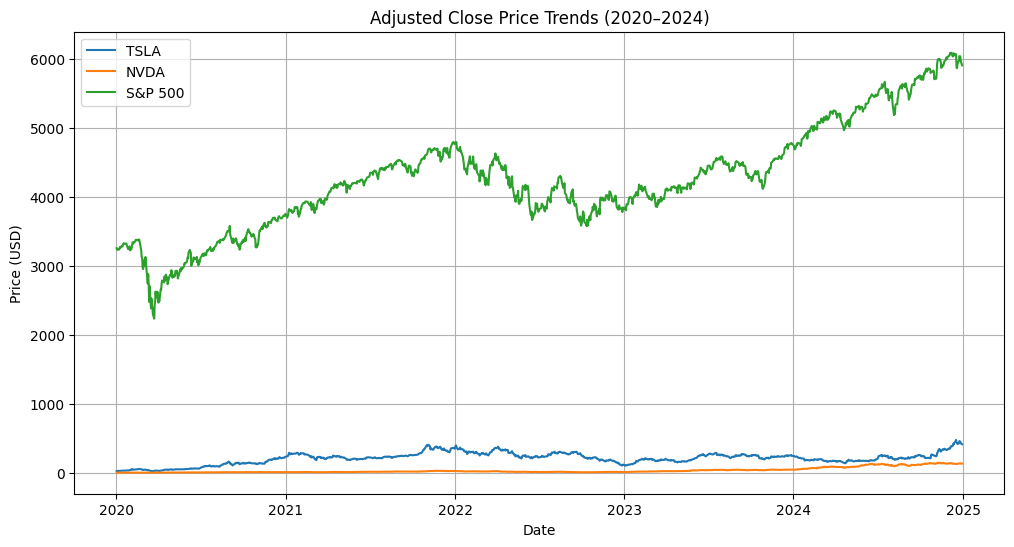

In [54]:
# Adjusted Close Price Trend Comparison

plt.figure(figsize=(12, 6))
plt.plot(df['TSLA'], label='TSLA')
plt.plot(df['NVDA'], label='NVDA')
plt.plot(df['S&P 500'], label='S&P 500')
plt.title("Adjusted Close Price Trends (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

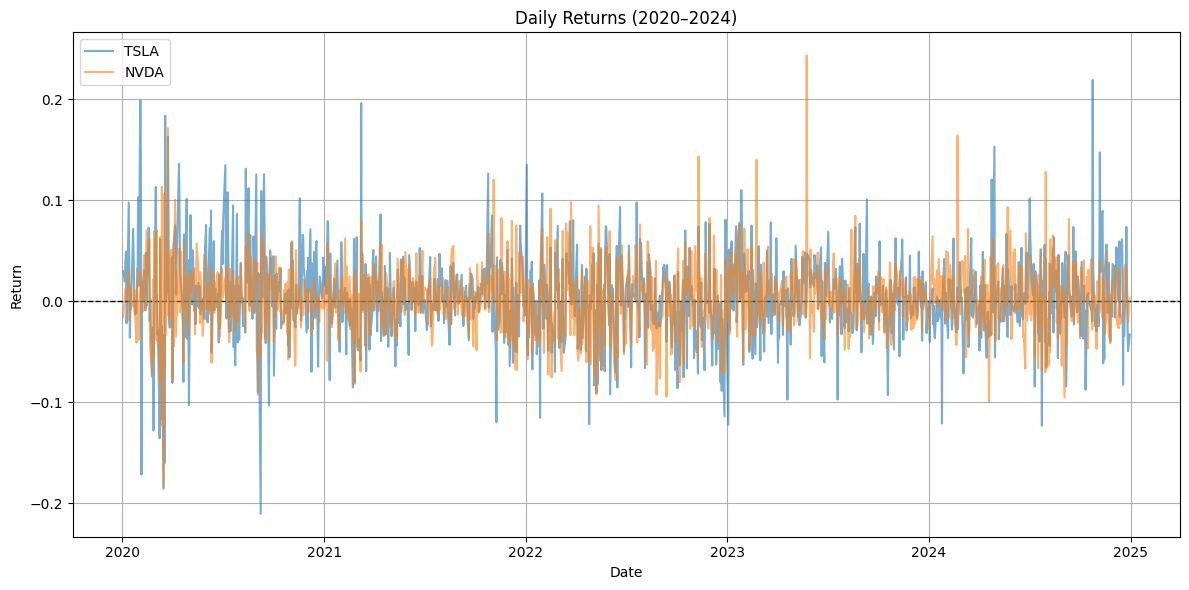

In [55]:
# Calculate and Plot Daily Returns (Line plot)

# Daily returns
returns = df.pct_change().dropna()

plt.figure(figsize=(12, 6))
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.plot(returns['TSLA'], label='TSLA', alpha=0.6)
plt.plot(returns['NVDA'], label='NVDA', alpha=0.6)
plt.title("Daily Returns (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

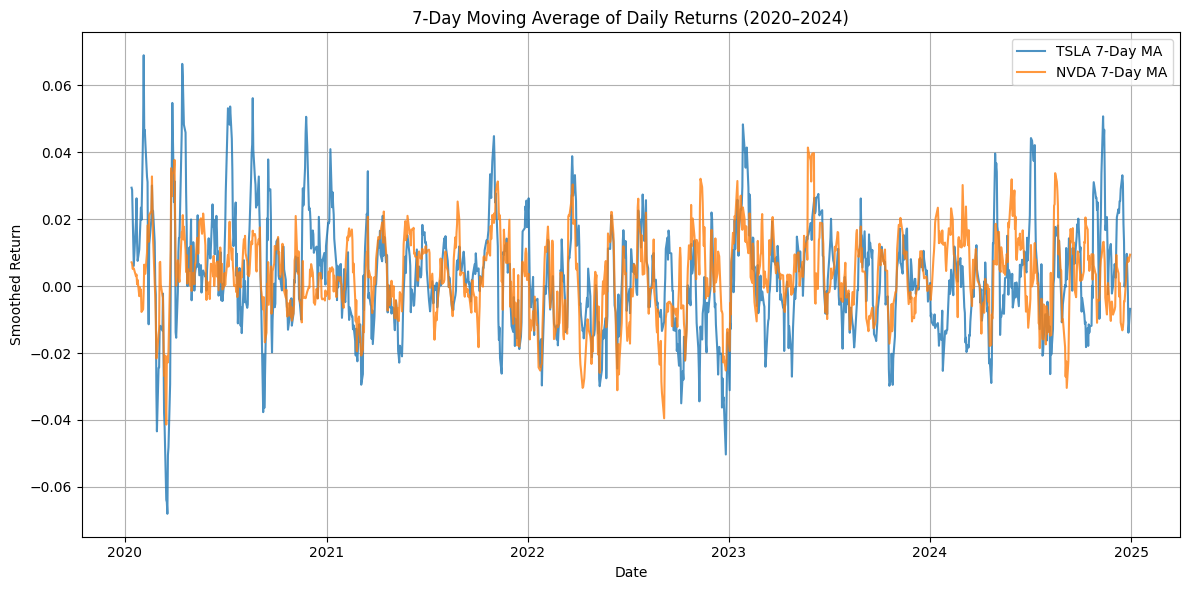

In [56]:
# 7-Day Rolling Average of Daily Returns

rolling_avg = returns[['TSLA', 'NVDA']].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['TSLA'], label='TSLA 7-Day MA', alpha=0.8)
plt.plot(rolling_avg['NVDA'], label='NVDA 7-Day MA', alpha=0.8)
plt.title("7-Day Moving Average of Daily Returns (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Smoothed Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

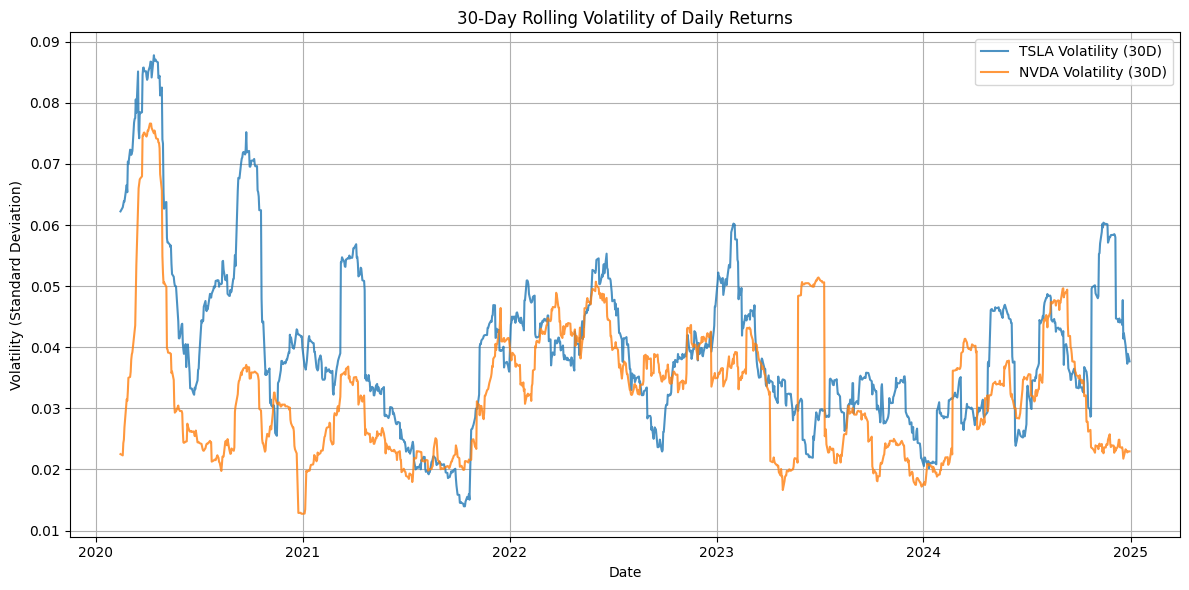

In [57]:
# 30-day rolling standard deviation of returns (volatility)

rolling_vol = returns[['TSLA', 'NVDA']].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(rolling_vol['TSLA'], label='TSLA Volatility (30D)', alpha=0.8)
plt.plot(rolling_vol['NVDA'], label='NVDA Volatility (30D)', alpha=0.8)
plt.title("30-Day Rolling Volatility of Daily Returns")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

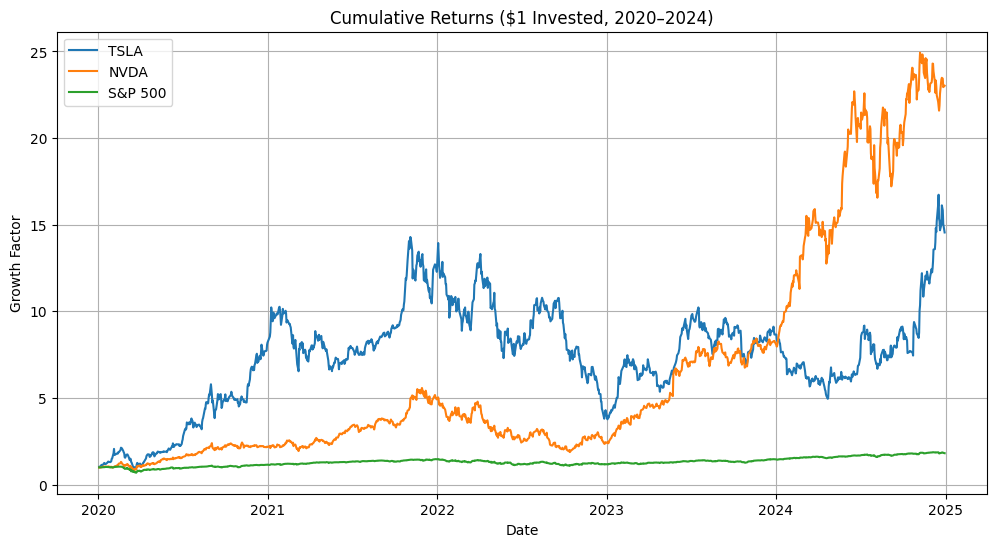

In [58]:
# Cumulative Returns

cumulative = (1 + returns).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(cumulative['TSLA'], label='TSLA')
plt.plot(cumulative['NVDA'], label='NVDA')
plt.plot(cumulative['S&P 500'], label='S&P 500')
plt.title("Cumulative Returns ($1 Invested, 2020–2024)")
plt.xlabel("Date")
plt.ylabel("Growth Factor")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Volatility (Annual)

# Volatility = std dev × √252 trading days
volatility = returns.std() * (252**0.5)
print("Annualized Volatility (2020–2024):")
print(volatility.sort_values(ascending=False))

Annualized Volatility (2020–2024):
TSLA       0.671894
NVDA       0.538874
S&P 500    0.213473
dtype: float64


In [60]:
# Correlation Matrix

correlation = returns.corr()
print("Return Correlation Matrix:\n", correlation)

Return Correlation Matrix:
              TSLA      NVDA   S&P 500
TSLA     1.000000  0.465935  0.501114
NVDA     0.465935  1.000000  0.696157
S&P 500  0.501114  0.696157  1.000000


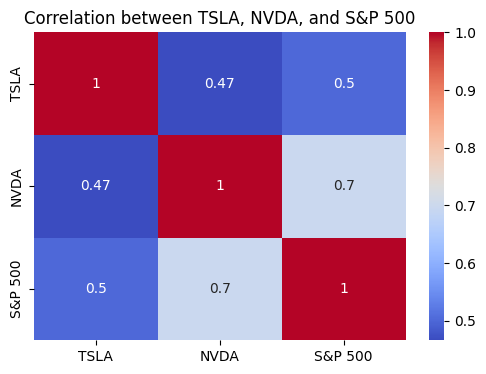

In [61]:
# Heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between TSLA, NVDA, and S&P 500")
plt.show()

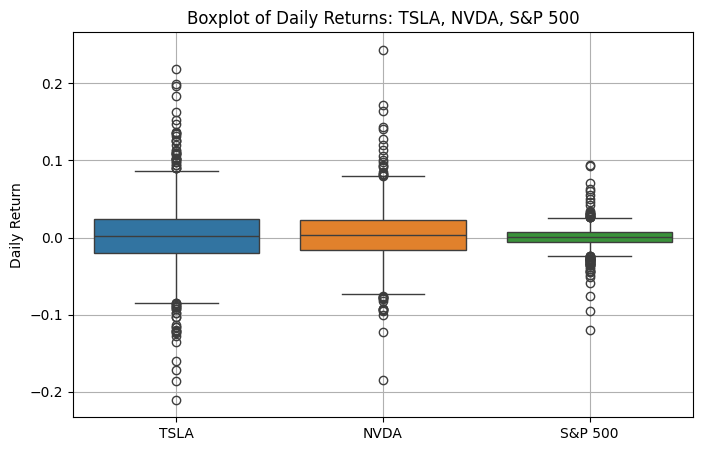

In [62]:
# Boxplot – Daily Return Distributions

returns = df.pct_change().dropna()

plt.figure(figsize=(8, 5))
sns.boxplot(data=returns)
plt.title("Boxplot of Daily Returns: TSLA, NVDA, S&P 500")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

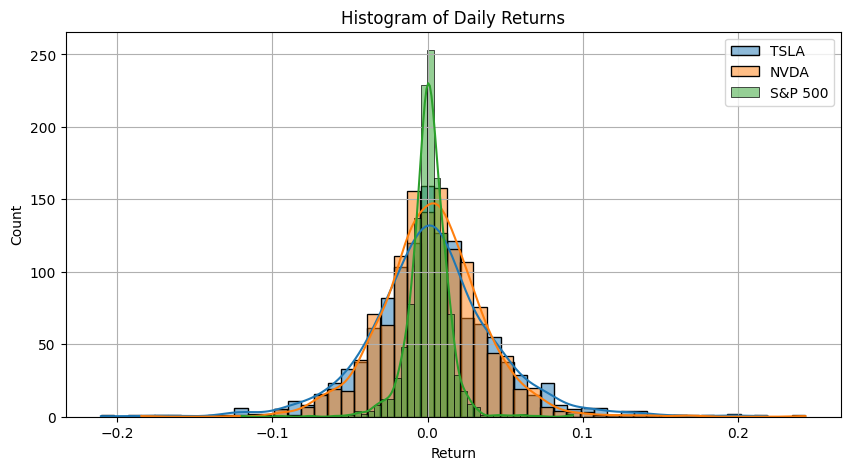

In [63]:
#  Histogram – Distribution of Returns

plt.figure(figsize=(10, 5))
for col in returns.columns:
    sns.histplot(returns[col], kde=True, bins=50, label=col, alpha=0.5)

plt.title("Histogram of Daily Returns")
plt.xlabel("Return")
plt.legend()
plt.grid(True)
plt.show()

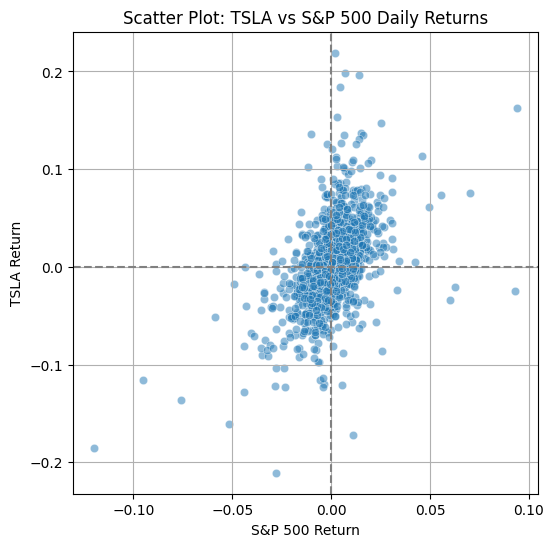

In [64]:
# Scatter Plot – TSLA vs S&P 500

plt.figure(figsize=(6, 6))
sns.scatterplot(x=returns['S&P 500'], y=returns['TSLA'], alpha=0.5)
plt.title("Scatter Plot: TSLA vs S&P 500 Daily Returns")
plt.xlabel("S&P 500 Return")
plt.ylabel("TSLA Return")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [65]:
# Regression Analysis – TSLA vs S&P 500

# Independent variable (X) = S&P 500 returns
X = returns['S&P 500']
X = sm.add_constant(X)  # adds intercept

# Dependent variable (Y) = TSLA returns
y = returns['TSLA']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     420.5
Date:                Sun, 18 May 2025   Prob (F-statistic):           8.13e-81
Time:                        18:12:52   Log-Likelihood:                 2371.8
No. Observations:                1256   AIC:                            -4740.
Df Residuals:                    1254   BIC:                            -4729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.063      0.0

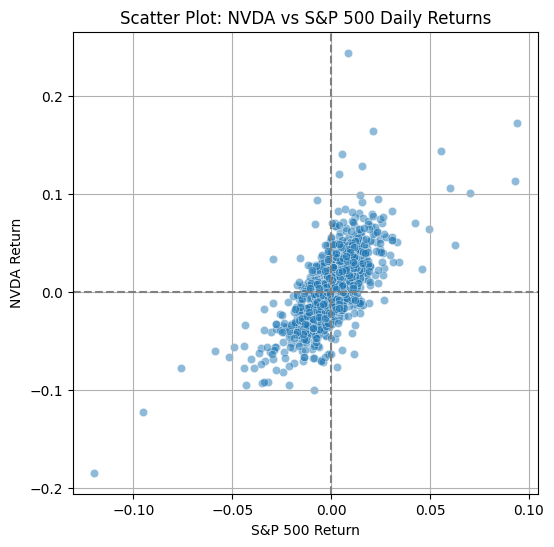

In [66]:
# Scatter Plot – NVDA vs S&P 500

plt.figure(figsize=(6, 6))
sns.scatterplot(x=returns['S&P 500'], y=returns['NVDA'], alpha=0.5)
plt.title("Scatter Plot: NVDA vs S&P 500 Daily Returns")
plt.xlabel("S&P 500 Return")
plt.ylabel("NVDA Return")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [67]:
#  Regression – NVDA Return ~ S&P 500 Return

# Independent variable (X) = S&P 500 returns
X_nvda = sm.add_constant(returns['S&P 500'])

# Dependent variable (Y) = NVDA returns
y_nvda = returns['NVDA']

# Fit OLS regression model
model_nvda = sm.OLS(y_nvda, X_nvda).fit()
print(model_nvda.summary())


                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1179.
Date:                Sun, 18 May 2025   Prob (F-statistic):          1.01e-182
Time:                        18:12:53   Log-Likelihood:                 2883.6
No. Observations:                1256   AIC:                            -5763.
Df Residuals:                    1254   BIC:                            -5753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      3.019      0.0

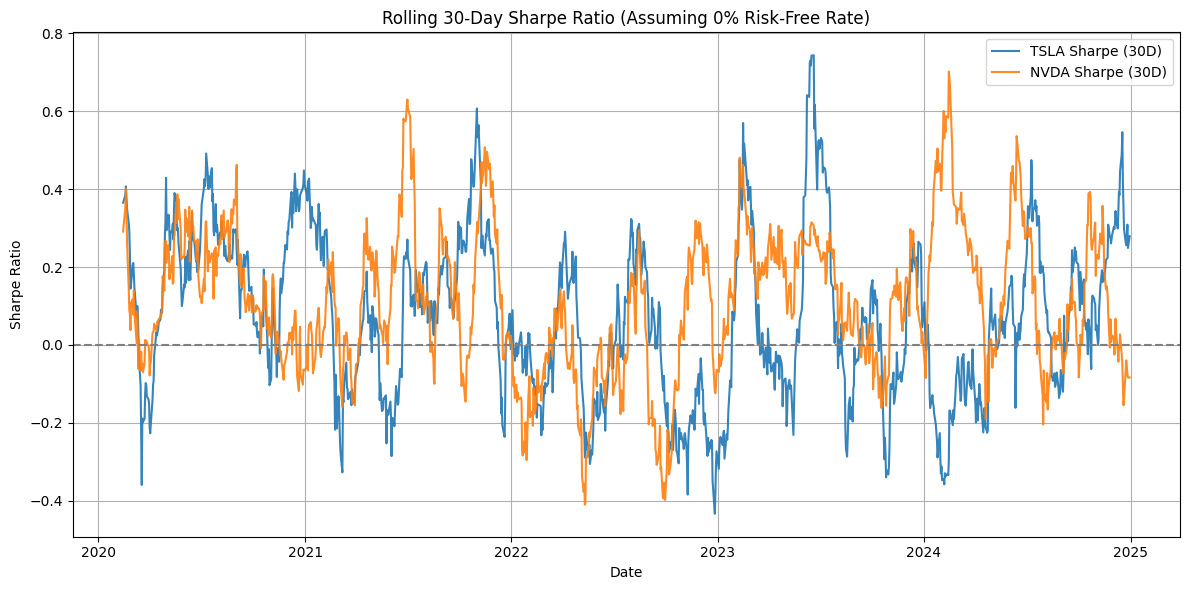

In [68]:
# Sharpe Ratio (Rolling 30-Day) (The Sharpe Ratio measures risk-adjusted return: Sharpe Ratio = Average Return − Risk-Free Rate / Volatility)

# 30-day rolling mean and std dev
rolling_mean = returns[['TSLA', 'NVDA']].rolling(window=30).mean()
rolling_std = returns[['TSLA', 'NVDA']].rolling(window=30).std()

# Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = rolling_mean / rolling_std

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sharpe_ratio['TSLA'], label='TSLA Sharpe (30D)', alpha=0.9)
plt.plot(sharpe_ratio['NVDA'], label='NVDA Sharpe (30D)', alpha=0.9)
plt.title("Rolling 30-Day Sharpe Ratio (Assuming 0% Risk-Free Rate)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
# Average Sharpe Ratio

# Annualized Sharpe Ratio = mean_daily_return / std_dev * sqrt(252)
sharpe_tsla = returns['TSLA'].mean() / returns['TSLA'].std() * np.sqrt(252)
sharpe_nvda = returns['NVDA'].mean() / returns['NVDA'].std() * np.sqrt(252)

print(f"Average Sharpe Ratio (2020–2024):")
print(f"TSLA: {sharpe_tsla:.2f}")
print(f"NVDA: {sharpe_nvda:.2f}")

Average Sharpe Ratio (2020–2024):
TSLA: 1.13
NVDA: 1.44


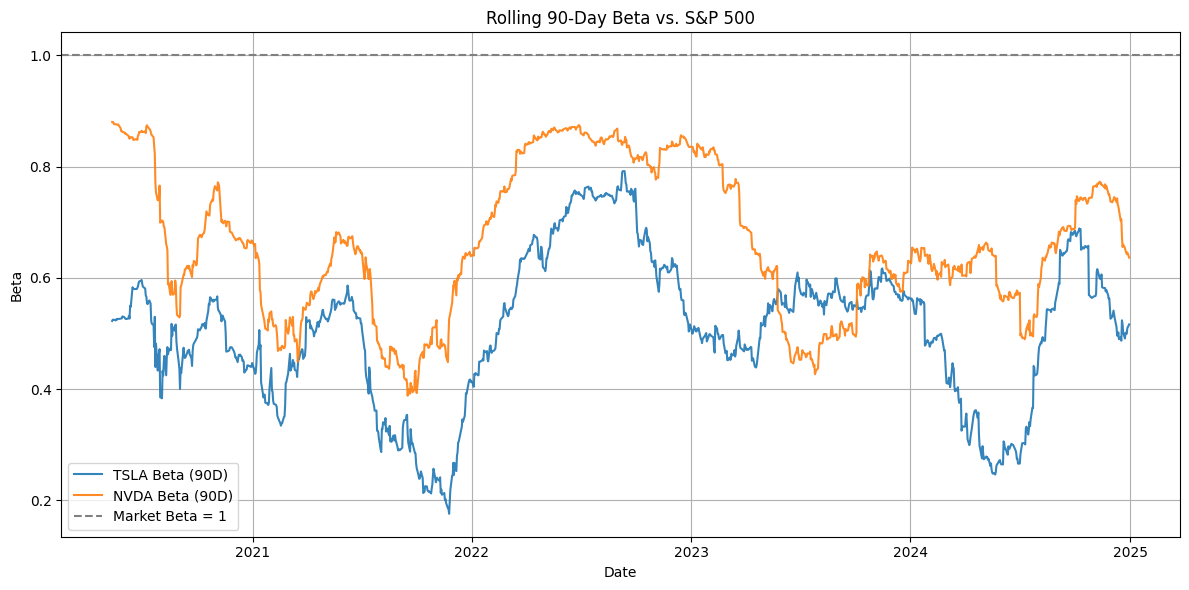

In [70]:
# Beta Over Time (Rolling 90-Day) (Beta measures how sensitive a stock is to the market (S&P 500 here))

rolling_beta_tsla = returns['TSLA'].rolling(90).corr(returns['S&P 500'])
rolling_beta_nvda = returns['NVDA'].rolling(90).corr(returns['S&P 500'])

plt.figure(figsize=(12, 6))
plt.plot(rolling_beta_tsla, label='TSLA Beta (90D)', alpha=0.9)
plt.plot(rolling_beta_nvda, label='NVDA Beta (90D)', alpha=0.9)
plt.title("Rolling 90-Day Beta vs. S&P 500")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.axhline(1, color='gray', linestyle='--', label='Market Beta = 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
# Average Beta vs. S&P 500

# Beta = correlation × (std_X / std_market)
corr_tsla = returns['TSLA'].corr(returns['S&P 500'])
corr_nvda = returns['NVDA'].corr(returns['S&P 500'])

std_tsla = returns['TSLA'].std()
std_nvda = returns['NVDA'].std()
std_sp = returns['S&P 500'].std()

beta_tsla = corr_tsla * (std_tsla / std_sp)
beta_nvda = corr_nvda * (std_nvda / std_sp)

print(f"\nAverage Beta (2020–2024):")
print(f"TSLA: {beta_tsla:.2f}")
print(f"NVDA: {beta_nvda:.2f}")


Average Beta (2020–2024):
TSLA: 1.58
NVDA: 1.76


,TSLA,NVDA
Metric,,
Sharpe Ratio,1.13,1.44
Beta,1.58,1.76


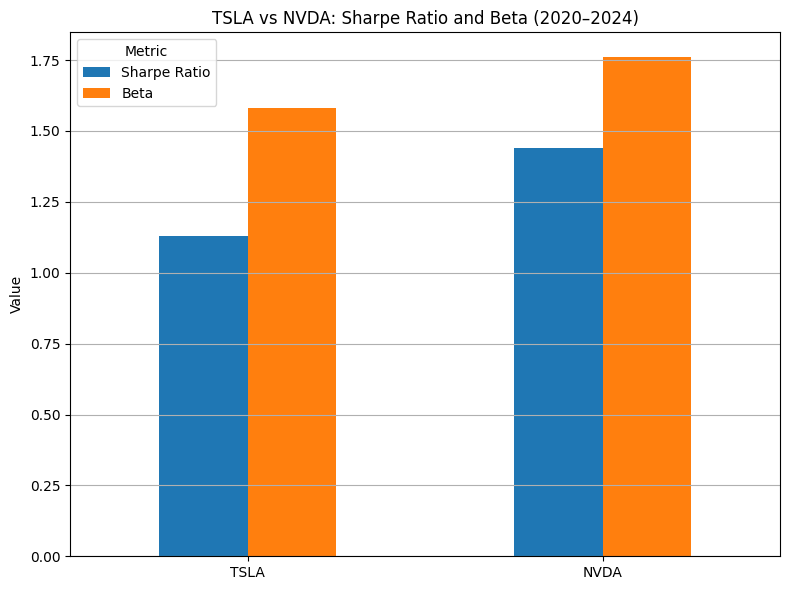

In [72]:
# Summary Table/bar chats

summary_data = {
    'Metric': ['Sharpe Ratio', 'Beta'],
    'TSLA': [1.13, 1.58],
    'NVDA': [1.44, 1.76]
}

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Metric', inplace=True)

# Plot bar chart
ax = summary_df.T.plot(kind='bar', figsize=(8, 6))
plt.title("TSLA vs NVDA: Sharpe Ratio and Beta (2020–2024)")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()

summary_df

# FEATURE ENGINEERING

In [74]:
# Create 'Returns' feature (showing daily percentage change)

df['TSLA_Return'] = df['TSLA'].pct_change()
df['NVDA_Return'] = df['NVDA'].pct_change()

In [75]:
# Create 'Direction' feature (showing daily price movement: up or down)

df['TSLA_Tomorrow'] = df['TSLA'].shift(-1)
df['TSLA_Direction'] = (df['TSLA_Tomorrow'] > df['TSLA']).astype(int)

df['NVDA_Tomorrow'] = df['NVDA'].shift(-1)
df['NVDA_Direction'] = (df['NVDA_Tomorrow'] > df['NVDA']).astype(int)

In [76]:
#Drop the missing values (NaN) for tomorrow's price

df.dropna(inplace=True)

In [77]:
df.head()

,TSLA,NVDA,S&P 500,TSLA_Return,NVDA_Return,TSLA_Tomorrow,TSLA_Direction,NVDA_Tomorrow,NVDA_Direction
Date,,,,,,,,,
2020-01-03,29.534000,5.876571,3234.850098,0.029633,-0.016006,30.102667,1,5.901216,1
2020-01-06,30.102667,5.901216,3246.280029,0.019255,0.004194,31.270666,1,5.972660,1
2020-01-07,31.270666,5.972660,3237.179932,0.038801,0.012107,32.809334,1,5.983861,1
2020-01-08,32.809334,5.983861,3253.050049,0.049205,0.001876,32.089333,0,6.049580,1
2020-01-09,32.089333,6.049580,3274.699951,-0.021945,0.010983,31.876667,0,6.081942,1


In [78]:
# Save new dataset with "Return" and "Directions": Merge adjusted close prices with the returns and direction on 'Date'

df = pd.merge(df_ts[['Date', 'Adj Close']], df_nv[['Date', 'Adj Close']], on='Date', suffixes=('_TSLA', '_NVDA'))
df = pd.merge(df, df_sp[['Date', 'Adj Close']], on='Date')
df.rename(columns={'Adj Close': 'S&P 500'}, inplace=True)


# Feature Engineering
df['TSLA_Return'] = df['Adj Close_TSLA'].pct_change()
df['NVDA_Return'] = df['Adj Close_NVDA'].pct_change()
df['TSLA_Tomorrow'] = df['Adj Close_TSLA'].shift(-1)
df['NVDA_Tomorrow'] = df['Adj Close_NVDA'].shift(-1)
df['TSLA_Direction'] = (df['TSLA_Tomorrow'] > df['Adj Close_TSLA']).astype(int)
df['NVDA_Direction'] = (df['NVDA_Tomorrow'] > df['Adj Close_NVDA']).astype(int)

# Drop missing values
df.dropna(inplace=True)

# Save to CSV
output_path = "TSLA_NVDA_SP_Featured.csv"
df.to_csv(output_path, index=False)

In [79]:
df.head()

,Date,Adj Close_TSLA,Adj Close_NVDA,S&P 500,TSLA_Return,NVDA_Return,TSLA_Tomorrow,NVDA_Tomorrow,TSLA_Direction,NVDA_Direction
1,2020-01-03,29.534000,5.876571,3234.850098,0.029633,-0.016006,30.102667,5.901216,1,1
2,2020-01-06,30.102667,5.901216,3246.280029,0.019255,0.004194,31.270666,5.972660,1,1
3,2020-01-07,31.270666,5.972660,3237.179932,0.038801,0.012107,32.809334,5.983861,1,1
4,2020-01-08,32.809334,5.983861,3253.050049,0.049205,0.001876,32.089333,6.049580,0,1
5,2020-01-09,32.089333,6.049580,3274.699951,-0.021945,0.010983,31.876667,6.081942,0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 1 to 1255
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1255 non-null   datetime64[ns]
 1   Adj Close_TSLA  1255 non-null   float64       
 2   Adj Close_NVDA  1255 non-null   float64       
 3   S&P 500         1255 non-null   float64       
 4   TSLA_Return     1255 non-null   float64       
 5   NVDA_Return     1255 non-null   float64       
 6   TSLA_Tomorrow   1255 non-null   float64       
 7   NVDA_Tomorrow   1255 non-null   float64       
 8   TSLA_Direction  1255 non-null   int64         
 9   NVDA_Direction  1255 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 107.9 KB


## MODEL BUILDING FOR TSLA (XGBoost and LSTM Models)

In [82]:
#!pip install keras-tuner

In [83]:
# Import libraries

from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import mlflow
import mlflow.sklearn
import mlflow.xgboost

In [84]:
# Separate label (Direction) and feature (Returns) from the dataset
df_ts = pd.read_csv("TSLA_NVDA_SP_Featured.csv")
df_ts.dropna(inplace=True)
df_ts = df_ts[['TSLA_Return', 'TSLA_Direction']]

In [85]:
# Instantiate XGBoost Classifier and StandardScaler

model = XGBClassifier()

ts_scaler = StandardScaler()

In [86]:
# Apply scaler to the Returns

scaled_ts_returns = ts_scaler.fit_transform(df_ts[['TSLA_Return']])

In [87]:
# Create 5-day rolling windows sequence for LSTM

def create_sequences(data, labels, window=5):
    x, y = [], []
    for i in range(len(data) - window):
        x.append(data[i:i + window])
        y.append(labels[i + window])
    return np.array(x), np.array(y)

x_seq, y_seq = create_sequences(scaled_ts_returns, df_ts['TSLA_Direction'].values, window=5)

In [88]:
# Create flat feature for XGBoost using the last value in each 5-day window

x_flat = x_seq.reshape(x_seq.shape[0], x_seq.shape[1])

In [89]:
# Split both x_seq and x_flat on the same index

split = int(len(x_flat) * 0.8)
ts_x_train_seq, ts_x_test_seq = x_seq[:split], x_seq[split:]
ts_x_train_flat, ts_x_test_flat = x_flat[:split], x_flat[split:]
ts_y_train, ts_y_test = y_seq[:split], y_seq[split:]

In [90]:
# Train XGBoost

ts_model_xgb = XGBClassifier()
ts_model_xgb.fit(ts_x_train_flat, ts_y_train)
ts_y_pred_xgb = ts_model_xgb.predict(ts_x_test_flat)

In [91]:
# Define model

ts_model_lstm = Sequential([
    Input(shape=(ts_x_train_seq.shape[1],ts_x_train_seq.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [92]:
# Compile the params

ts_model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
# Train the model

ts_model_lstm.fit(ts_x_train_seq, ts_y_train, epochs=20, batch_size=16, validation_data=(ts_x_test_seq, ts_y_test), verbose=0)

In [94]:
# Predict

ts_y_pred_lstm = (ts_model_lstm.predict(ts_x_test_seq) > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


TSLA XGB Confusion Matrix:
 [[48 75]
 [54 73]]
TSLA LSTM Confusion Matrix:
 [[ 13 110]
 [  8 119]]


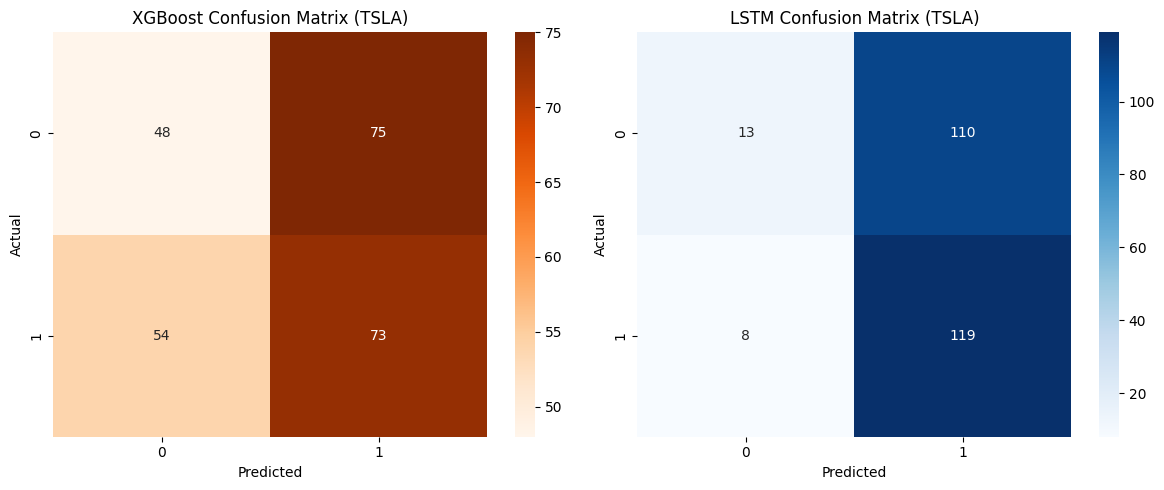

In [95]:
# Confusion Matrices

ts_cm_xgb = confusion_matrix(ts_y_test, ts_y_pred_xgb)
ts_cm_lstm = confusion_matrix(ts_y_test, ts_y_pred_lstm)

print("TSLA XGB Confusion Matrix:\n", ts_cm_xgb)
print("TSLA LSTM Confusion Matrix:\n", ts_cm_lstm)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(ts_cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axs[0])
axs[0].set_title('XGBoost Confusion Matrix (TSLA)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(ts_cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('LSTM Confusion Matrix (TSLA)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

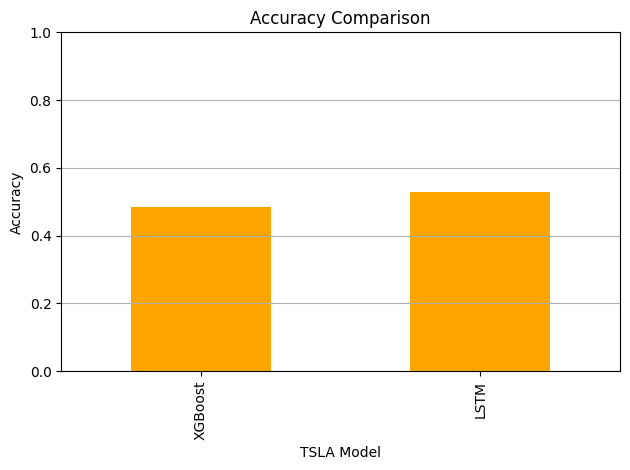

In [96]:
# Accuracy Comparison
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ts_acc_xgb = accuracy_score(ts_y_test, ts_y_pred_xgb)
ts_acc_lstm = accuracy_score(ts_y_test, ts_y_pred_lstm)

summary_df = pd.DataFrame({
    'TSLA Model': ['XGBoost', 'LSTM'],
    'TSLA Accuracy': [ts_acc_xgb, ts_acc_lstm]
})
summary_df.set_index('TSLA Model').plot(kind='bar', legend=False, color=['orange', 'skyblue'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [97]:
# Print metrics

print("XGBoost Accuracy:", ts_acc_xgb)
print("LSTM Accuracy:", ts_acc_lstm)
print("\nXGBoost Classification Report:")
print(classification_report(ts_y_test, ts_y_pred_xgb))
print("\nLSTM Classification Report:")
print(classification_report(ts_y_test, ts_y_pred_lstm))

XGBoost Accuracy: 0.484
LSTM Accuracy: 0.528

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.39      0.43       123
           1       0.49      0.57      0.53       127

    accuracy                           0.48       250
   macro avg       0.48      0.48      0.48       250
weighted avg       0.48      0.48      0.48       250


LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.11      0.18       123
           1       0.52      0.94      0.67       127

    accuracy                           0.53       250
   macro avg       0.57      0.52      0.42       250
weighted avg       0.57      0.53      0.43       250



(               TSLA XGBoost  TSLA LSTM
 Metric                                
 Accuracy               0.50       0.50
 Precision (1)          0.50       0.51
 Recall (1)             0.62       0.95
 F1-score (1)           0.56       0.66,
 'TSLA Model Comparison Summary.pdf')

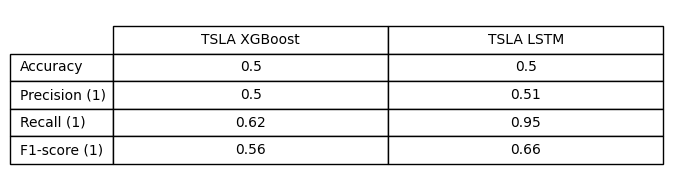

In [98]:
# TSLA evaluation metrics
summary_data = {
    "Metric": ["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)"],
    "TSLA XGBoost": [0.50, 0.50, 0.62, 0.56],
    "TSLA LSTM": [0.50, 0.51, 0.95, 0.66]
}

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data).set_index("Metric")

# Plot and export to PDF
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 rowLabels=summary_df.index,
                 loc='center',
                 cellLoc='center')
table.scale(1.2, 1.5)
plt.tight_layout()

# Save to PDF
pdf_path = "TSLA Model Comparison Summary.pdf"
plt.savefig(pdf_path)

summary_df, pdf_path

## MODEL BUILDING FOR NVDA (XGBoost and LSTM Models)

In [100]:
# Reload the dataset

df_nv = pd.read_csv("TSLA_NVDA_SP_Featured.csv")
df_nv.dropna(inplace=True)
df_nv = df_nv[['NVDA_Return', 'NVDA_Direction']]

In [101]:
# Apply scaler to the Returns

nv_scaler = StandardScaler()

scaled_nv_returns = nv_scaler.fit_transform(df_nv[['NVDA_Return']])

In [102]:
# Create 5-day rolling windows sequence for LSTM

def create_sequences(data, labels, window=5):
    x, y = [], []
    for i in range(len(data) - window):
        x.append(data[i:i + window])
        y.append(labels[i + window])
    return np.array(x), np.array(y)

x_seq, y_seq = create_sequences(scaled_nv_returns, df_nv['NVDA_Direction'].values, window=5)

In [103]:
# Create flat feature for XGBoost using the last value in each 5-day window

x_flat = x_seq.reshape(x_seq.shape[0], x_seq.shape[1])

In [104]:
# Split both x_seq and x_flat on the same index

split = int(len(x_flat) * 0.8)
nv_x_train_seq, nv_x_test_seq = x_seq[:split], x_seq[split:]
nv_x_train_flat, nv_x_test_flat = x_flat[:split], x_flat[split:]
nv_y_train, nv_y_test = y_seq[:split], y_seq[split:]

In [105]:
# Train XGBoost

nv_model_xgb = XGBClassifier()
nv_model_xgb.fit(nv_x_train_flat, nv_y_train)
nv_y_pred_xgb = nv_model_xgb.predict(nv_x_test_flat)

In [106]:
# Define LSTM Model

nv_model_lstm = Sequential([
    Input(shape=(nv_x_train_seq.shape[1], nv_x_train_seq.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [107]:
# Compile params

nv_model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nv_model_lstm.fit(nv_x_train_seq, nv_y_train, epochs=20, batch_size=16, validation_data=(nv_x_test_seq, nv_y_test), verbose=0)
nv_y_pred_lstm = (nv_model_lstm.predict(nv_x_test_seq) > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [108]:
# Train the model

nv_model_lstm.fit(nv_x_train_seq, nv_y_train, epochs=20, batch_size=16, validation_data=(nv_x_test_seq, nv_y_test), verbose=0)

In [109]:
# Predict

nv_y_pred_lstm = (nv_model_lstm.predict(nv_x_test_seq) > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


NVDA XGB Confusion Matrix:
 [[48 62]
 [60 80]]
NVDA LSTM Confusion Matrix:
 [[ 33  77]
 [ 32 108]]


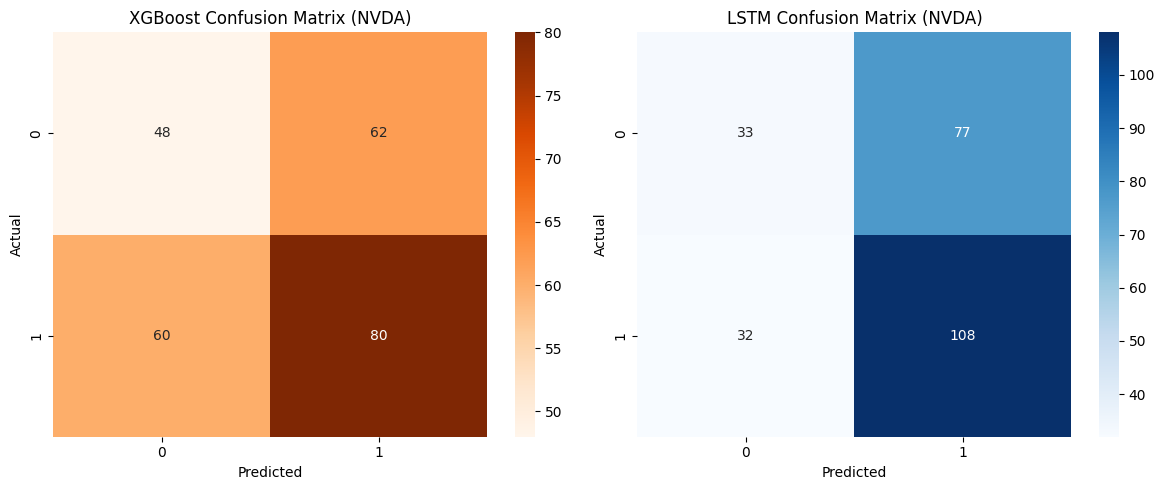

In [110]:
# Confusion Matrices

nv_cm_xgb = confusion_matrix(nv_y_test, nv_y_pred_xgb)
nv_cm_lstm = confusion_matrix(nv_y_test, nv_y_pred_lstm)

print("NVDA XGB Confusion Matrix:\n", nv_cm_xgb)
print("NVDA LSTM Confusion Matrix:\n", nv_cm_lstm)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(nv_cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axs[0])
axs[0].set_title('XGBoost Confusion Matrix (NVDA)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(nv_cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('LSTM Confusion Matrix (NVDA)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

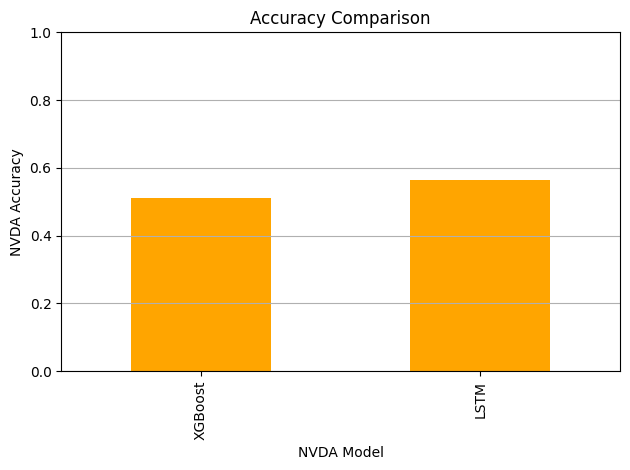

In [111]:
# Accuracy Comparison

nv_acc_xgb = accuracy_score(nv_y_test, nv_y_pred_xgb)
nv_acc_lstm = accuracy_score(nv_y_test, nv_y_pred_lstm)

summary_df = pd.DataFrame({
    'NVDA Model': ['XGBoost', 'LSTM'],
    'NVDA Accuracy': [nv_acc_xgb, nv_acc_lstm]
})
summary_df.set_index('NVDA Model').plot(kind='bar', legend=False, color=['orange', 'skyblue'])
plt.title('Accuracy Comparison')
plt.ylabel('NVDA Accuracy')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [112]:
# Print metrics

print("XGBoost Accuracy:", nv_acc_xgb)
print("LSTM Accuracy:", nv_acc_lstm)
print("\nXGBoost Classification Report:")
print(classification_report(nv_y_test, nv_y_pred_xgb))
print("\nLSTM Classification Report:")
print(classification_report(nv_y_test, nv_y_pred_lstm))

XGBoost Accuracy: 0.512
LSTM Accuracy: 0.564

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44       110
           1       0.56      0.57      0.57       140

    accuracy                           0.51       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.51      0.51      0.51       250


LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.30      0.38       110
           1       0.58      0.77      0.66       140

    accuracy                           0.56       250
   macro avg       0.55      0.54      0.52       250
weighted avg       0.55      0.56      0.54       250



(               NVDA XGBoost  NVDA LSTM
 Metric                                
 Accuracy               0.52       0.56
 Precision (1)          0.57       0.58
 Recall (1)             0.52       0.78
 F1-score (1)           0.55       0.67,
 'NVDA Model Comparison Summary.pdf')

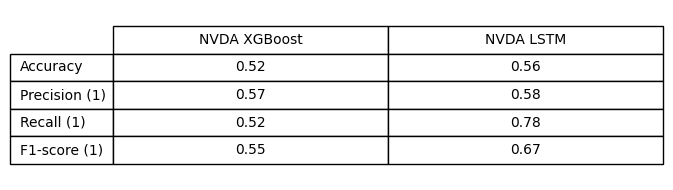

In [113]:
# NVDA evaluation metrics 
summary_data = {
    "Metric": ["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)"],
    "NVDA XGBoost": [0.52, 0.57, 0.52, 0.55],
    "NVDA LSTM": [0.56, 0.58, 0.78, 0.67]
}

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data).set_index("Metric")

# Plot and export to PDF
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 rowLabels=summary_df.index,
                 loc='center',
                 cellLoc='center')
table.scale(1.2, 1.5)
plt.tight_layout()

# Save to PDF
pdf_path = "NVDA Model Comparison Summary.pdf"
plt.savefig(pdf_path)

summary_df, pdf_path

## HYPERPARAMETER TUNING

In [115]:
# Import Libraries

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

#set up kfold
cv = KFold(n_splits=5,random_state=42,shuffle=True)

In [116]:
# Set MLflow tracking for TSLA
mlflow.set_tracking_uri("file:mlruns")
mlflow.set_experiment("TSLA_XGBoost_Trend_Prediction")

# Start MLflow run
mlflow.start_run(run_name=f"{ticker}_XGBoost_Model")

2025/05/18 18:14:18 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



<ActiveRun: >

In [117]:
# Define grid search parameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

In [118]:
# Run GridSearchCV for TSLA XGBoost model
ts_mod_search = GridSearchCV(
    estimator=ts_model_xgb,
    param_grid=param_grid,
    scoring={'accuracy': 'accuracy', 'f1_micro': 'f1_micro'},
    refit='f1_micro',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

In [119]:
# Fit the optimized model on the training data set and train the model again

ts_mod_search.fit(ts_x_train_flat, ts_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     imp...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             refit='f1_micro',
             scoring={'accuracy': 'accuracy', 'f1_micro': 'f1_micro'},
             verbose=1)

In [120]:
# Extract best model and performance
tuned_ts_xgb = ts_mod_search.best_estimator_
best_params = ts_mod_search.best_params_
best_score = ts_mod_search.best_score_

In [121]:
best_params, best_score

({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8},
 np.float64(0.538))

In [122]:
# Create prediction
ts_xgb_pred = tuned_ts_xgb.predict(ts_x_test_flat)

In [123]:
# Log to MLflow

mlflow.log_param("n_estimators", 50)
mlflow.log_param("max_depth", 5)
mlflow.log_param("learning_rate", 0.01)
mlflow.log_metric("accuracy", ts_acc_xgb)

mlflow.xgboost.log_model(tuned_ts_xgb, artifact_path="Tuned TSLA XGB MODEL")

2025/05/18 18:14:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [124]:
# TSLA LSTM Hyperparameter tuning with Keras Tuner

mlflow.set_tracking_uri("file:mlruns")
mlflow.set_experiment("TSLA_LSTM_Trend_Prediction")

# Start MLflow run
#mlflow.start_run(run_name=f"{ticker}_LSTM_Model")

<Experiment: artifact_location='file:///C:/Users/oduol/OneDrive/Deployed Projects/mlruns/583177649884329278', creation_time=1747616601210, experiment_id='583177649884329278', last_update_time=1747616601210, lifecycle_stage='active', name='TSLA_LSTM_Trend_Prediction', tags={}>

In [125]:
# Build the model

tuned_ts_lstm = Sequential([
    Input(shape=(ts_x_train_seq.shape[1], ts_x_train_seq.shape[2])),
    LSTM(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [126]:
# Compile
tuned_ts_lstm.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [127]:
# Train

tuned_ts_lstm.fit(
    ts_x_train_seq, ts_y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3)],
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5059 - loss: 0.6930 - val_accuracy: 0.5250 - val_loss: 0.6916
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5136 - loss: 0.6935 - val_accuracy: 0.5300 - val_loss: 0.6910
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5307 - loss: 0.6898 - val_accuracy: 0.5300 - val_loss: 0.6910
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5423 - loss: 0.6874 - val_accuracy: 0.5300 - val_loss: 0.6910
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5448 - loss: 0.6885 - val_accuracy: 0.5300 - val_loss: 0.6910
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5170 - loss: 0.6921 - val_accuracy: 0.5300 - val_loss: 0.6910
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5026 - loss: 0.6934 - val_accuracy: 0.5300 - val_loss: 0.6909
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5269 - loss: 0.6906 - val_accuracy: 0.5300 - v

In [128]:
# Predict and Evaluate
ts_lstm_pred = (tuned_ts_lstm.predict(ts_x_test_seq) > 0.5).astype(int)

ts_acc_lstm = accuracy_score(ts_y_test, ts_lstm_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [129]:
# Log to MLflow
mlflow.log_param("units", 100)
mlflow.log_param("activation", "relu")
mlflow.log_param("optimizer", "nadam")
mlflow.log_metric("test_accuracy", ts_acc_lstm)

mlflow.keras.log_model(tuned_ts_lstm, artifact_path="Tuned TSLA LSTM Model")

2025/05/18 18:14:57 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/18 18:15:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


TLSA TUNED XGB Confusion Matrix:
 [[44 79]
 [38 89]]
TLSA TUNED LSTM Confusion Matrix:
 [[ 22 101]
 [ 17 110]]


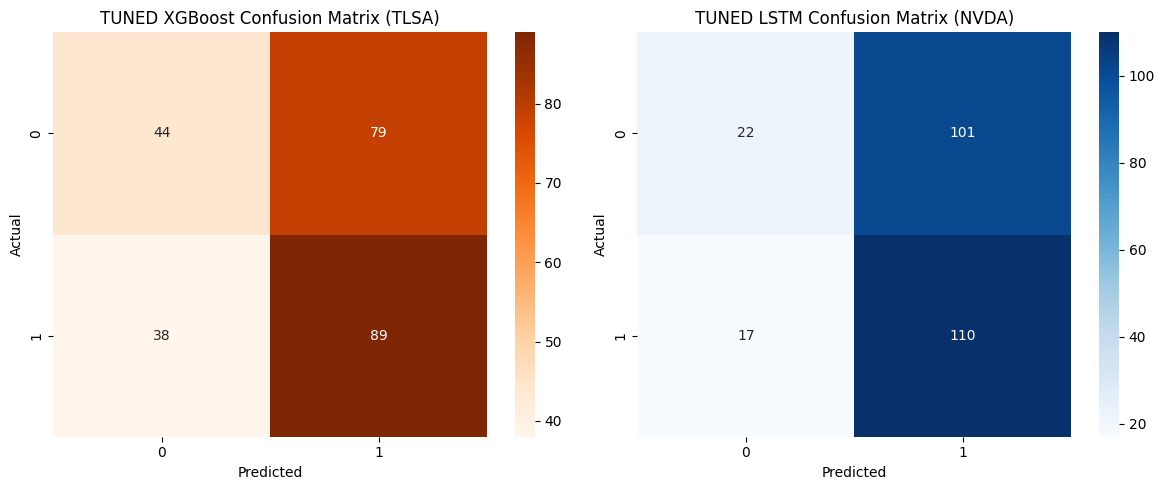

In [130]:
# Confusion Matrices

ts_cm_xgb = confusion_matrix(ts_y_test, ts_xgb_pred)
ts_cm_lstm = confusion_matrix(ts_y_test, ts_lstm_pred)

print("TLSA TUNED XGB Confusion Matrix:\n", ts_cm_xgb)
print("TLSA TUNED LSTM Confusion Matrix:\n", ts_cm_lstm)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(ts_cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axs[0])
axs[0].set_title('TUNED XGBoost Confusion Matrix (TLSA)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(ts_cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('TUNED LSTM Confusion Matrix (NVDA)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

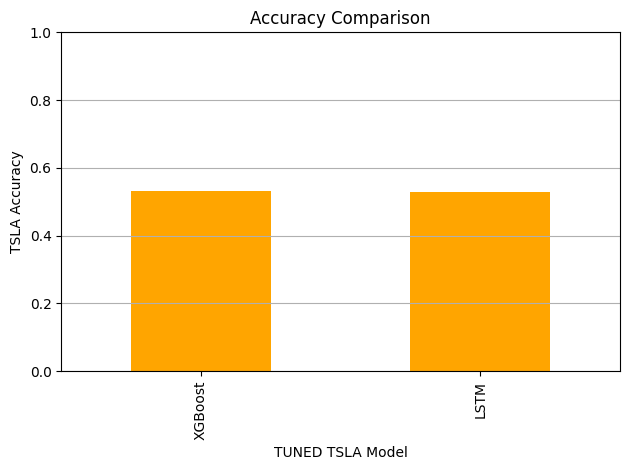

In [131]:
# Accuracy Comparison

ts_acc_xgb = accuracy_score(ts_y_test, ts_xgb_pred)
ts_acc_lstm = accuracy_score(ts_y_test, ts_lstm_pred)

summary_df = pd.DataFrame({
    'TUNED TSLA Model': ['XGBoost', 'LSTM'],
    'TUNED TSLA Accuracy': [ts_acc_xgb, ts_acc_lstm]
})
summary_df.set_index('TUNED TSLA Model').plot(kind='bar', legend=False, color=['orange', 'skyblue'])
plt.title('Accuracy Comparison')
plt.ylabel('TSLA Accuracy')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [132]:
# Print metrics

print("TUNED XGBoost Accuracy:", ts_acc_xgb)
print("TUNED LSTM Accuracy:", ts_acc_lstm)
print("\nXGBoost Classification Report:")
print(classification_report(ts_y_test, ts_xgb_pred))
print("\nLSTM Classification Report:")
print(classification_report(ts_y_test, ts_lstm_pred))
print(f"Logged to MLflow run: {mlflow.active_run().info.run_id}")

mlflow.end_run()

TUNED XGBoost Accuracy: 0.532
TUNED LSTM Accuracy: 0.528

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.36      0.43       123
           1       0.53      0.70      0.60       127

    accuracy                           0.53       250
   macro avg       0.53      0.53      0.52       250
weighted avg       0.53      0.53      0.52       250


LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.18      0.27       123
           1       0.52      0.87      0.65       127

    accuracy                           0.53       250
   macro avg       0.54      0.52      0.46       250
weighted avg       0.54      0.53      0.46       250

Logged to MLflow run: f66f5dceefb348aa87d7d0a02af90831


(               TSLA XGBoost  TSLA LSTM
 Metric                                
 Accuracy               0.50       0.51
 Precision (1)          0.50       0.51
 Recall (1)             0.92       0.99
 F1-score (1)           0.65       0.67,
 'TUNED TSLA Model Comparison Summary.pdf')

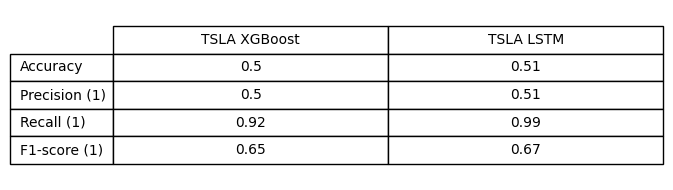

In [133]:
# TSLA evaluation metrics 
summary_data = {
    "Metric": ["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)"],
    "TSLA XGBoost": [0.50, 0.50, 0.92, 0.65],
    "TSLA LSTM": [0.51, 0.51, 0.99, 0.67]
}

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data).set_index("Metric")

# Plot and export to PDF
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 rowLabels=summary_df.index,
                 loc='center',
                 cellLoc='center')
table.scale(1.2, 1.5)
plt.tight_layout()

# Save to PDF
pdf_path = "TUNED TSLA Model Comparison Summary.pdf"
plt.savefig(pdf_path)

summary_df, pdf_path

In [134]:
# Set MLflow tracking for NVDA

mlflow.set_tracking_uri("file:mlruns")
mlflow.set_experiment("NVDA_XGBoost_Trend_Prediction")

# Start MLflow run
mlflow.start_run(run_name=f"{ticker}_XGBoost_Model")

<ActiveRun: >

In [135]:
# Run GridSearchCV for NVDA XGBoost model
nv_mod_search = GridSearchCV(
    estimator=nv_model_xgb,
    param_grid=param_grid,
    scoring={'accuracy': 'accuracy', 'f1_micro': 'f1_micro'},
    refit='f1_micro',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

In [136]:
# Fit the optimized model on the training data set and train the model again

nv_mod_search.fit(nv_x_train_flat, nv_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     imp...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             refit='f1_micro',
             scoring={'accuracy': 'accuracy', 'f1_micro': 'f1_micro'},
             verbose=1)

In [137]:
# Extract best model and performance
tuned_nv_xgb = nv_mod_search.best_estimator_
best_params = nv_mod_search.best_params_
best_score = nv_mod_search.best_score_

In [138]:
best_params, best_score

({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8},
 np.float64(0.532))

In [139]:
# Create prediction
nv_xgb_pred = tuned_nv_xgb.predict(nv_x_test_flat)

In [140]:
# Log to MLflow

mlflow.log_param("n_estimators", 50)
mlflow.log_param("max_depth", 3)
mlflow.log_param("learning_rate", 0.01)
mlflow.log_metric("accuracy", nv_acc_xgb)

mlflow.xgboost.log_model(tuned_nv_xgb, artifact_path="Tuned NVDA XGB MODEL")

2025/05/18 18:15:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [141]:
# NVDA LSTM Hyperparameter tuning with Keras Tuner

mlflow.set_tracking_uri("file:mlruns")
mlflow.set_experiment("NVDA_LSTM_Trend_Prediction")

# Start MLflow run
#mlflow.start_run(run_name=f"{ticker}_LSTM_Model")

<Experiment: artifact_location='file:///C:/Users/oduol/OneDrive/Deployed Projects/mlruns/678987810425648396', creation_time=1747616693775, experiment_id='678987810425648396', last_update_time=1747616693775, lifecycle_stage='active', name='NVDA_LSTM_Trend_Prediction', tags={}>

In [142]:
# Build Model

tuned_nv_lstm = Sequential([
    Input(shape=(nv_x_train_seq.shape[1], nv_x_train_seq.shape[2])),
    LSTM(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [143]:
# Compile

tuned_nv_lstm.compile(
    optimizer='nadam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [144]:
# Train
tuned_nv_lstm.fit(
    nv_x_train_seq, nv_y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3)],
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4933 - loss: 0.6931 - val_accuracy: 0.5500 - val_loss: 0.6904
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5523 - loss: 0.6893 - val_accuracy: 0.5500 - val_loss: 0.6889
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5337 - loss: 0.6908 - val_accuracy: 0.5600 - val_loss: 0.6890
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5622 - loss: 0.6871 - val_accuracy: 0.5600 - val_loss: 0.6877
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5262 - loss: 0.6932 - val_accuracy: 0.5600 - val_loss: 0.6877
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5621 - loss: 0.6873 - val_accuracy: 0.5600 - val_loss: 0.6872
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5505 - loss: 0.6858 - val_accuracy: 0.5300 - val_loss: 0.6865
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5573 - loss: 0.6888 - val_accuracy: 0.5450 - v

In [145]:
# Predict and Evaluate
nv_lstm_pred = (tuned_nv_lstm.predict(nv_x_test_seq) > 0.5).astype(int)

nv_acc_lstm = accuracy_score(nv_y_test, nv_lstm_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [146]:
# Log to MLflow
mlflow.log_param("units", 100)
mlflow.log_param("activation", "relu")
mlflow.log_param("optimizer", "nadam")
mlflow.log_metric("test_accuracy", nv_acc_lstm)

mlflow.keras.log_model(tuned_nv_lstm, artifact_path="Tuned NVDA LSTM Model")

2025/05/18 18:15:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/18 18:15:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


NVDA TUNED XGB Confusion Matrix:
 [[  3 107]
 [  3 137]]
NVDA TUNED LSTM Confusion Matrix:
 [[ 11  99]
 [  8 132]]


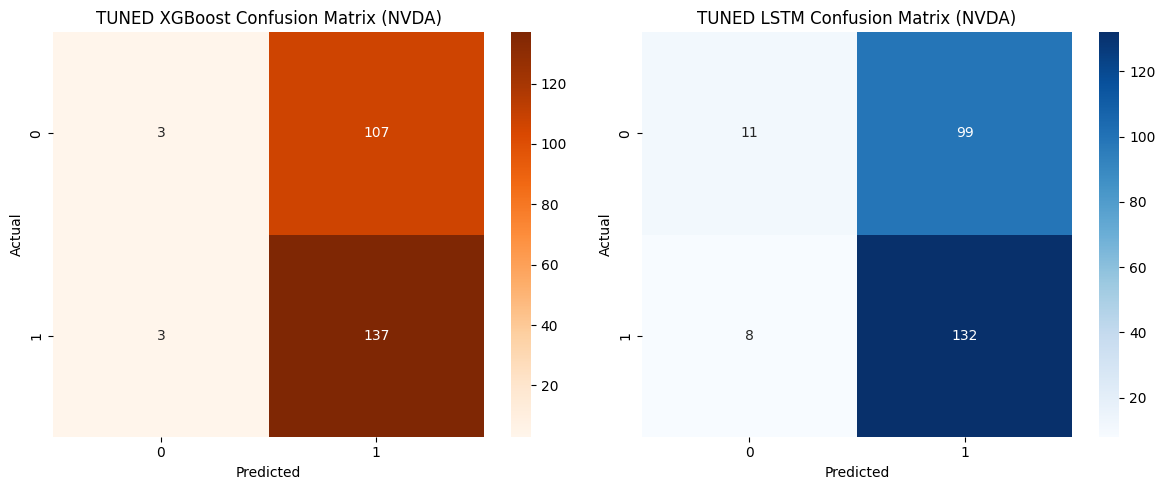

In [147]:
# Confusion Matrices

nv_cm_xgb = confusion_matrix(nv_y_test, nv_xgb_pred)
nv_cm_lstm = confusion_matrix(nv_y_test, nv_lstm_pred)

print("NVDA TUNED XGB Confusion Matrix:\n", nv_cm_xgb)
print("NVDA TUNED LSTM Confusion Matrix:\n", nv_cm_lstm)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(nv_cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axs[0])
axs[0].set_title('TUNED XGBoost Confusion Matrix (NVDA)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(nv_cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('TUNED LSTM Confusion Matrix (NVDA)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

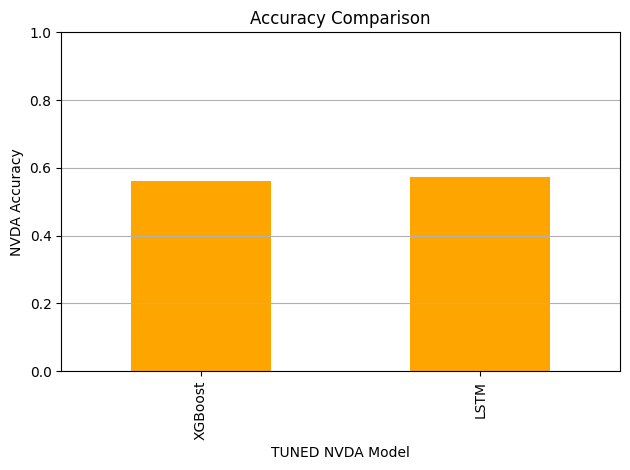

In [148]:
# Accuracy Comparison

nv_acc_xgb = accuracy_score(nv_y_test, nv_xgb_pred)
nv_acc_lstm = accuracy_score(nv_y_test, nv_lstm_pred)

summary_df = pd.DataFrame({
    'TUNED NVDA Model': ['XGBoost', 'LSTM'],
    'TUNED NVDA Accuracy': [nv_acc_xgb, nv_acc_lstm]
})
summary_df.set_index('TUNED NVDA Model').plot(kind='bar', legend=False, color=['orange', 'skyblue'])
plt.title('Accuracy Comparison')
plt.ylabel('NVDA Accuracy')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [149]:
# Print metrics

print("TUNED XGBoost Accuracy:", nv_acc_xgb)
print("TUNED LSTM Accuracy:", nv_acc_lstm)
print("\nXGBoost Classification Report:")
print(classification_report(nv_y_test, nv_xgb_pred))
print("\nLSTM Classification Report:")
print(classification_report(nv_y_test, nv_lstm_pred))
print(f"Logged to MLflow run: {mlflow.active_run().info.run_id}")

mlflow.end_run()

TUNED XGBoost Accuracy: 0.56
TUNED LSTM Accuracy: 0.572

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.05       110
           1       0.56      0.98      0.71       140

    accuracy                           0.56       250
   macro avg       0.53      0.50      0.38       250
weighted avg       0.53      0.56      0.42       250


LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.10      0.17       110
           1       0.57      0.94      0.71       140

    accuracy                           0.57       250
   macro avg       0.58      0.52      0.44       250
weighted avg       0.57      0.57      0.47       250

Logged to MLflow run: 89f8427f12264e74b039d5cdab243493


(               NVDA XGBoost  NVDA LSTM
 Metric                                
 Accuracy               0.55       0.57
 Precision (1)          0.56       0.57
 Recall (1)             0.99       0.91
 F1-score (1)           0.71       0.71,
 'TUNED NVDA Model Comparison Summary.pdf')

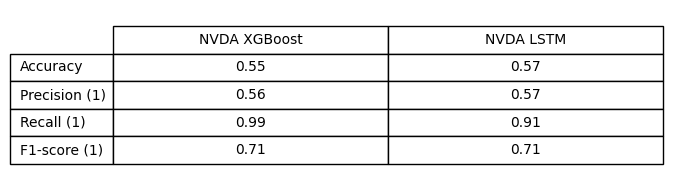

In [150]:
# NVDA evaluation metrics 
summary_data = {
    "Metric": ["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)"],
    "NVDA XGBoost": [0.55, 0.56, 0.99, 0.71],
    "NVDA LSTM": [0.57, 0.57, 0.91, 0.71]
}

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data).set_index("Metric")

# Plot and export to PDF
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 rowLabels=summary_df.index,
                 loc='center',
                 cellLoc='center')
table.scale(1.2, 1.5)
plt.tight_layout()

# Save to PDF
pdf_path = "TUNED NVDA Model Comparison Summary.pdf"
plt.savefig(pdf_path)

summary_df, pdf_path

In [151]:
#!pip install mlflow
#!pip install python-docx

In [152]:
# Import Libraries

import joblib
from pathlib import Path
import zipfile
from docx import Document
from docx.shared import Inches

In [153]:
 # Create a clean step-by-step Word + Markdown documentation of the full workflow including Docker, zip steps

doc = Document()
doc.add_heading("Complete Step-by-Step Workflow for Stock Trend Prediction & Deployment", level=1)

steps = [
    ("Step 1: Extract Stock Price Data", 
     "Use yfinance to download TSLA, NVDA, and S&P 500 data from 2020-01-01 to 2024-12-31."),

    ("Step 2: Extract Financial Data", 
     "Gather annual financial data (2010–2024) for TSLA and NVDA from their Investor Relations sites."),

    ("Step 3: Clean & Structure Data", 
     "Preprocess CSV files, align on Date column, remove missing data, and merge into a single DataFrame."),

    ("Step 4: Perform EDA", 
     "Plot price trends, calculate and plot daily and cumulative returns, volatility, and compare against S&P 500."),

    ("Step 5: Feature Engineering", 
     "Create 'Return' and binary 'Direction' features. Use StandardScaler to scale the returns."),

    ("Step 6: Create Model Inputs", 
     "Prepare LSTM input using 5-day sequences (x_seq), and XGBoost input using the last value in each window (x_flat)."),

    ("Step 7: Split Dataset", 
     "Split both x_seq and x_flat into training (80%) and testing (20%) sets."),

    ("Step 8: Train XGBoost Model", 
     "Train XGBoost using x_flat and corresponding target values (Direction)."),

    ("Step 9: Train LSTM Model", 
     "Define and train LSTM on x_seq data for time series classification."),

    ("Step 10: Evaluate Both Models", 
     "Use accuracy, precision, recall, F1-score, and confusion matrix for evaluation."),

    ("Step 11: Hyperparameter Tuning", 
     "Use GridSearchCV for XGBoost and Keras Tuner for LSTM to optimize performance."),

    ("Step 12: Save Trained Models and Scaler", 
     "Save XGBoost (.pkl), LSTM (.h5), and scaler (.pkl) using joblib and TensorFlow's save method."),

    ("Step 13: Track Experiments with MLflow", 
     "Log model parameters, metrics, and artifacts using MLflow with a local tracking URI."),

    ("Step 14: Build Streamlit App", 
     "Create `app.py` that allows users to select a model and input returns to predict movement."),

    ("Step 15: Containerize with Docker", 
     "Write Dockerfile and build container image to run Streamlit app in a self-contained environment."),

    ("Step 16: Initialize Git Repo", 
     "Track all scripts, models, and documentation with Git for version control and reproducibility."),

    ("Step 17: Bundle Deployment Assets", 
     "Create a .zip file including: app.py, models, scaler, MLflow logs, Dockerfile, and README."),

    ("Step 18: Write Final Report", 
     "Save this step-by-step workflow as both .docx and .md files for submission or sharing.")
]

for title, detail in steps:
    doc.add_heading(title, level=2)
    doc.add_paragraph(detail)

# Save Word document
workflow_docx = "Stock_Model_Deployment_Workflow.docx"
doc.save(workflow_docx)

# Create Markdown version
workflow_md = "Stock_Model_Deployment_Workflow.md"
with open(workflow_md, "w") as f:
    f.write("#Complete Step-by-Step Workflow for Stock Trend Prediction & Deployment\n\n")
    for title, detail in steps:
        f.write(f"## {title}\n{detail}\n\n")

workflow_docx, workflow_md

('Stock_Model_Deployment_Workflow.docx', 'Stock_Model_Deployment_Workflow.md')

In [154]:
# Save models
joblib.dump(tuned_ts_xgb, "tsla_xgb_model.pkl")
joblib.dump(tuned_nv_xgb, "nvda_xgb_model.pkl")
tuned_ts_lstm.save("tsla_lstm_model.h5")
tuned_nv_lstm.save("nvda_lstm_model.h5")

In [155]:
# Save scalers
joblib.dump(ts_scaler, "tsla_scaler.pkl")
joblib.dump(nv_scaler, "nvda_scaler.pkl")

['nvda_scaler.pkl']

In [156]:
# Create dockerfile

dockerfile_content = '''\
# Dockerfile for TSLA/NVDA Streamlit App

FROM python:3.9-slim

# Set working directory
WORKDIR /app

# Copy necessary files
COPY . .

# Install dependencies
RUN pip install --upgrade pip && \\
    pip install -r requirements.txt

# Expose Streamlit port
EXPOSE 8501

# Run Streamlit app
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.enableCORS=false"]
'''

# Save it as 'Dockerfile'
with open("Dockerfile", "w") as f:
    f.write(dockerfile_content)

In [157]:
# Create Project file

mlproject_content = '''\
name: stock-trend-prediction

conda_env: conda.yaml

entry_points:
  main:
    parameters:
      data_path: {type: str, default: "TSLA_NVDA_SP_Featured.csv"}
    command: >
      python train_models.py --data_path {data_path}
'''
with open("MLproject", "w") as f:
    f.write(mlproject_content)

In [158]:
# Bundle TSLA + NVDA + config/deployment files into a zip
bundle_path = "TSLA_NVDA_Stock_Prediction_Bundle.zip"
with zipfile.ZipFile(bundle_path, 'w') as zipf:
    # Core project setup files
    core_files = [
        "requirements.txt", "MLproject", "README.md",
        "Dockerfile", "app.py",
        "tsla_xgb_model.pkl", "tsla_lstm_model.h5", "tsla_scaler.pkl",
        "nvda_xgb_model.pkl", "nvda_lstm_model.h5", "nvda_scaler.pkl",
        "Stock_Model_Deployment_Workflow.docx", "Stock_Model_Deployment_Workflow.md"
    ]
    for file in core_files:
        file_path = Path("") / file
        if file_path.exists():
            zipf.write(file_path, arcname=file)

bundle_path

'TSLA_NVDA_Stock_Prediction_Bundle.zip'

In [159]:
# Create .streamlit file for Streamlit Cloud Deployment
import os

streamlit_dir = ".streamlit"
os.makedirs(streamlit_dir, exist_ok=True)

config_content = """
[theme]
primaryColor = "#4CAF50"
base = "light"
"""

config_path = os.path.join(streamlit_dir, "config.toml")
with open(config_path, "w") as f:
    f.write(config_content)

config_path

'.streamlit\\config.toml'

In [160]:
# Create a simple placeholder image (chart icon)
from PIL import Image, ImageDraw

logo_path = Path("chart_icon.png")
img = Image.new("RGB", (100, 100), color=(255, 255, 255))
draw = ImageDraw.Draw(img)
draw.line((20, 80, 40, 60, 60, 70, 80, 30), fill="blue", width=4)
draw.rectangle((18, 78, 22, 82), fill="blue")
draw.rectangle((38, 58, 42, 62), fill="blue")
draw.rectangle((58, 68, 62, 72), fill="blue")
draw.rectangle((78, 28, 82, 32), fill="blue")
img.save(logo_path)